## CPSC 663 Problem Set 1
### Joanna Chen

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn.neighbors
from sklearn.neighbors import NearestNeighbors
from sklearn.svm import SVC
from sklearn import tree

## Problem 1
What are the characteristics of a machine learning algorithm and what is meant by ”learning” from data?

A machine learning algorithm is data dependent. It could be overfitted to the data when there’s too much data, or underfit the data if there’s not enough much data. Mitchell (1997) says " A computer program is said to learn from experience E with respect to some class of tasks T and performance measure P, if its performance at tasks in T, as measured by P, improves with experience E."  We can also understand learning from data means finding the intrinsic properties from the data. For example, in a generative model, the data are assumed to be generated from a probabilistic model, learning from data means estimating the parameters of the probabilistic model. Estimating the parameters can be achieved by maximum a posteriori (MAP), Gibbs sampling, and variational inference.


## Problem 2

Least Squares Solution: $w^{*}=\left(X^{T} X\right)^{-1} X^{T} y$

L2 Norm: $\| x \|_{2}=\left(\sum_{i=1}^{n}\left|x_{i}\right|^{2}\right)^{\frac{1}{2}}$

### 1. 
Write code in Python that randomly generates N points sampled uniformly in the interval x ∈ [−1, 3]. Then output the function $y = x^2 − 3x + 1$ for each of the points generated. Then write code that adds zero-mean Gaussian noise with standard deviation σ to y. Make plots of x and y with N ∈ {15, 100} and σ ∈ {0, 0.05, 0.2} (there should be six plots in total). Save the point sets for following questions. Hint: You may want to check the NumPy library for generating noise.

In [18]:
def plot(n, sigma):
  """
  n: number of (x,y)
  sigma: noise add to y
  """
  np.random.seed(123)

  x = [0] * n
  y = [0] * n

  for i in range(n):
    x[i] = np.random.uniform(-1, 3)

  x = np.sort(x)

  for i in range(n):
    y[i] = x[i]** 2 - 3* x[i] + 1 + np.random.normal(0, sigma)

  plt.title('N = {}, sigma = {}'.format(n, sigma))
  plt.plot(x, y, 'bo')
  plt.show()
  return x, y

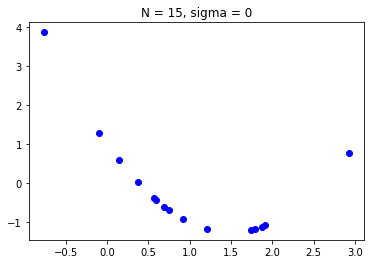

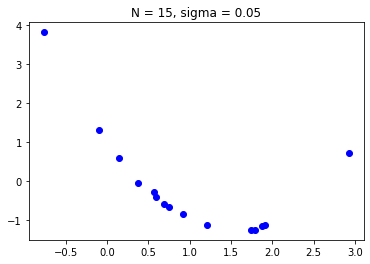

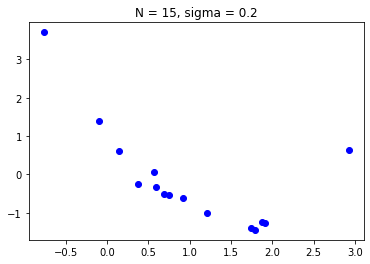

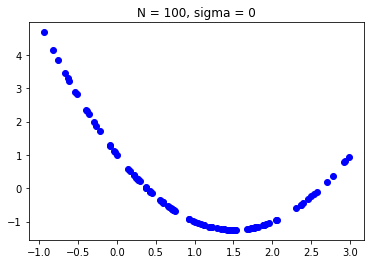

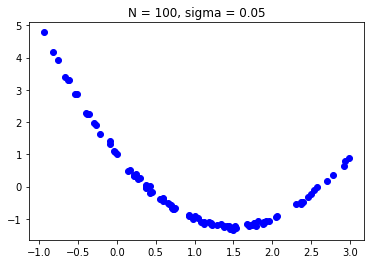

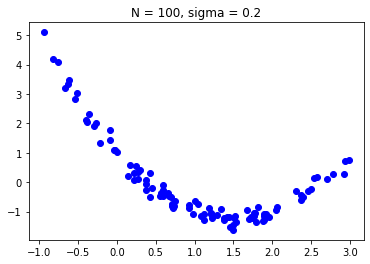

In [19]:
N = [15,100]
sigma = [0,0.05,0.2]

x1, y1 = plot(15, 0)
x2, y2 = plot(15, 0.05)
x3, y3 = plot(15, 0.2)
x4, y4 = plot(100, 0)
x5, y5 = plot(100, 0.05)
x6, y6 = plot(100, 0.2)


### 2. 
Find the optimal weights (in terms of MSE) for fitting a polynomial function to the data in all 6 cases generated above using a polynomial of degree 1, 2, and 9. Use the least squares analytical solution given above. Do not use built-in methods for regression. Plot the fitted curves on the same plot as the data points (you can plot all 3 polynomial curves on the same plot). Report the fitted weights and the MSE in tables. Qualitatively assess the fit of the curves. Does it look like any of the models overfit, underfit, or appropriately fit the data? Explain your reasoning in one to two sentences (no calculations necessary).

In [20]:
def LSR(old_x, y, deg):
  """
  least square regression
  x, y: points
  deg: polynomial degree
  """
  old_x = np.array(old_x).reshape(-1,1)
  y = np.array(y).reshape(-1,1)
  x = np.ones((len(old_x), 1))

  for i in range(1, deg + 1):
    x = np.append(x, np.power(old_x, i), axis=1)

  w = np.linalg.inv(x.T.dot(x)).dot(x.T.dot(y))
  y_pred = x.dot(w)
  mse = np.mean((y - y_pred)**2)

  plt.plot(old_x, y, 'bo')
  plt.plot(x[:,1], y_pred)
  
  return w, mse

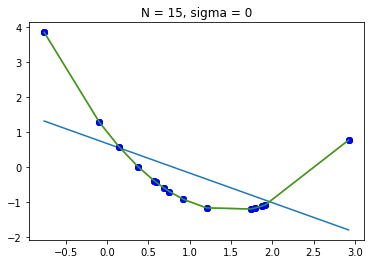

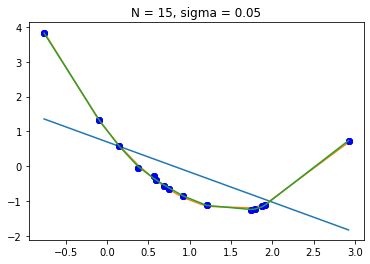

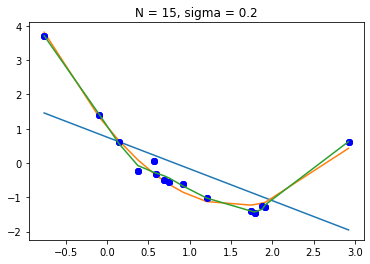

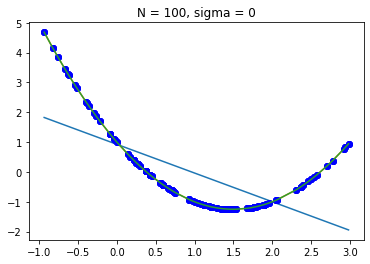

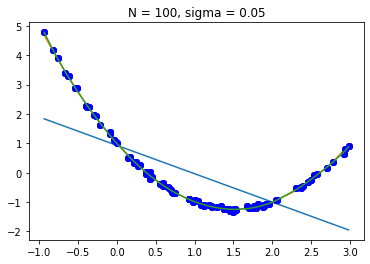

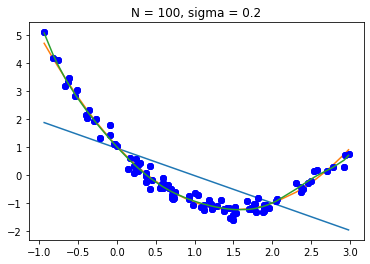

In [21]:
plt.title('N = 15, sigma = 0')
w1_d1, mse1_d1 = LSR(x1, y1, 1)
w1_d2, mse1_d2 = LSR(x1, y1, 2)
w1_d9, mse1_d9 = LSR(x1, y1, 9)
plt.show()

plt.title('N = 15, sigma = 0.05')
w2_d1, mse2_d1 = LSR(x2, y2, 1)
w2_d2, mse2_d2 = LSR(x2, y2, 2)
w2_d9, mse2_d9 = LSR(x2, y2, 9)
plt.show()

plt.title('N = 15, sigma = 0.2')
w3_d1, mse3_d1 = LSR(x3, y3, 1)
w3_d2, mse3_d2 = LSR(x3, y3, 2)
w3_d9, mse3_d9 = LSR(x3, y3, 9)
plt.show()

plt.title('N = 100, sigma = 0')
w4_d1, mse4_d1 = LSR(x4, y4, 1)
w4_d2, mse4_d2 = LSR(x4, y4, 2)
w4_d9, mse4_d9 = LSR(x4, y4, 9)
plt.show()

plt.title('N = 100, sigma = 0.05')
w5_d1, mse5_d1 = LSR(x5, y5, 1)
w5_d2, mse5_d2 = LSR(x5, y5, 2)
w5_d9, mse5_d9 = LSR(x5, y5, 9)
plt.show()

plt.title('N = 100, sigma = 0.2')
w6_d1, mse6_d1 = LSR(x6, y6, 1)
w6_d2, mse6_d2 = LSR(x6, y6, 2)
w6_d9, mse6_d9 = LSR(x6, y6, 9)
plt.show()

From the plot, we can see that when degree = 9, N = 15, $\sigma = 0.2$ (green line), it's overfitting. This is because the curve tries to pass through almost every single points. Other than this case, degree = 2 and degree = 9 appropriately fits the data. Degree = 1 underfits the data, regardless of the $N$ and $\sigma$ used. The data is nonlinear and it fits a linear line when degree = 1. 

In [22]:
# Fitted weights and MSE
pd.options.display.width = 100
pd.options.display.max_colwidth = 100

data = {'N = 15, sigma = 0':[w1_d1, w1_d2, w1_d9],
        'N = 15, sigma = 0.05':[w2_d1, w2_d2, w2_d9],
        'N = 15, sigma = 0.2':[w3_d1, w3_d2, w3_d9],
        'N = 100, sigma = 0':[w4_d1, w4_d2, w4_d9],
        'N = 100, sigma = 0.05':[w5_d1, w5_d2, w5_d9],
        'N = 100, sigma = 0.2':[w6_d1, w6_d2, w6_d9]}

df = pd.DataFrame(data, index =['deg1', 'deg2', 'deg9'])

df.style.set_caption("Fitted Weights")

,"N = 15, sigma = 0","N = 15, sigma = 0.05","N = 15, sigma = 0.2","N = 100, sigma = 0","N = 100, sigma = 0.05","N = 100, sigma = 0.2"
deg1,[[ 0.67935619] [-0.84573764]],[[ 0.69808039] [-0.86559191]],[[ 0.75425299] [-0.9251547 ]],[[ 0.92513665] [-0.96193314]],[[ 0.93149354] [-0.96651188]],[[ 0.95056422] [-0.98024808]]
deg2,[[ 1.] [-3.] [ 1.]],[[ 1.01281247] [-2.98013597] [ 0.98156292]],[[ 1.05124986] [-2.92054386] [ 0.9262517 ]],[[ 1.] [-3.] [ 1.]],[[ 1.00622061] [-3.00086876] [ 0.99817966]],[[ 1.02488246] [-3.00347503] [ 0.99271864]]
deg9,[[ 9.99813908e-01] [-2.99990561e+00] [ 9.99979712e-01] [ 5.20050526e-06] [-3.91900539e-06] [ 2.45869160e-06] [-1.25169754e-06] [ 6.70552254e-07] [-2.08616257e-07] [ 2.42143869e-08]],[[ 1.03780107] [ -3.17515117] [ -0.9185797 ] [ 8.33722952] [ -7.64493147] [ -6.69746888] [ 16.64891154] [-11.77262336] [ 3.66424616] [ -0.42706005]],[[ 1.15176256] [ -3.70088783] [ -6.67425796] [ 33.34890246] [-30.57971422] [-26.789883 ] [ 66.59565009] [-47.09049545] [ 14.65698534] [ -1.70824028]],[[ 9.99999997e-01] [-2.99999999e+00] [ 9.99999993e-01] [ 5.79802872e-09] [-1.54977897e-09] [ 9.45874490e-11] [-2.61934474e-10] [ 2.25554686e-10] [-6.63931132e-11] [ 6.59383659e-12]],[[ 0.99954888] [-3.00692369] [ 0.95430565] [ 0.09470927] [ 0.10310985] [-0.20173448] [ 0.04522525] [ 0.04644767] [-0.02458601] [ 0.00331478]],[[ 0.99819552] [-3.02769477] [ 0.81722262] [ 0.37883708] [ 0.4124394 ] [-0.80693791] [ 0.18090101] [ 0.18579067] [-0.09834406] [ 0.0132591 ]]


In [23]:
data = {'N = 15, sigma = 0':[mse1_d1, mse1_d2, mse1_d9],
        'N = 15, sigma = 0.05':[mse2_d1, mse2_d2, mse2_d9],
        'N = 15, sigma = 0.2':[mse3_d1, mse3_d2, mse3_d9],
        'N = 100, sigma = 0':[mse4_d1, mse4_d2, mse4_d9],
        'N = 100, sigma = 0.05':[mse5_d1, mse5_d2, mse5_d9],
        'N = 100, sigma = 0.2':[mse6_d1, mse6_d2, mse6_d9]}

df = pd.DataFrame(data, index =['deg1', 'deg2', 'deg9'])

df.style.set_caption("MSE")

,"N = 15, sigma = 0","N = 15, sigma = 0.05","N = 15, sigma = 0.2","N = 100, sigma = 0","N = 100, sigma = 0.05","N = 100, sigma = 0.2"
deg1,1.122831,1.083868,0.996268,1.097240,1.095629,1.119399
deg2,0.000000,0.002059,0.032944,0.000000,0.002380,0.038079
deg9,0.000000,0.000771,0.012333,0.000000,0.002077,0.033230


### 3. 
Apply L2 norm regularization with a 9-degree polynomial model to the cases with σ = 0.05 and N $\in$ {15,100}. Vary the parameter $\lambda$, and choose three values of $\lambda$ that result in the following scenarios: underfitting, overfitting, and an appropriate fit. Report the fitted weights and the MSE in each of these scenarios. Hint: The least squares solution can also be used for polynomial regression. Check slides of lecture 2 for details on L2 norm regularization.


In [24]:
def l2_reg(old_x, y, deg, lambd):
  old_x = np.array(old_x).reshape(-1,1)
  y = np.array(y).reshape(-1,1)
  x = np.ones((len(old_x), 1))

  for i in range(1, deg + 1):
    x = np.append(x, np.power(old_x, i), axis=1)

  I = np.identity(deg + 1)
  I[0,0] = 0
  w = np.linalg.inv(x.T.dot(x) + lambd*I).dot(x.T.dot(y))
  y_pred = x.dot(w)
  mse = np.mean((y - y_pred)**2)

  plt.plot(old_x, y, 'bo')
  plt.plot(x[:,1], y_pred)
  
  return w, mse

$\lambda = 0.0001, 0.1, 50$ was chosen. When $\lambda = 0.0001$ (blue), it's overfitting (at least it overfits more than $\lambda = 0.1$). We can see this from $N = 15$ plot. When $\lambda = 0.1$ (orange), it's appropriately fitting and $\lambda = 50$ (green), it's underfitting.

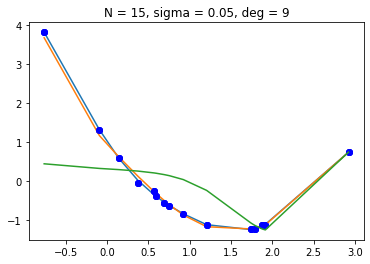

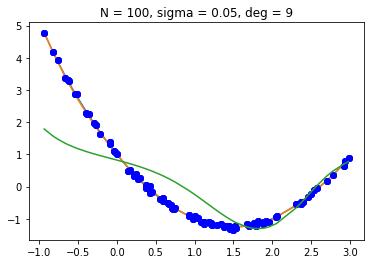

In [25]:
plt.title('N = 15, sigma = 0.05, deg = 9')
w_small, mse_small = l2_reg(x2, y2, 9, 0.0001) 
w_medium, mse_medium = l2_reg(x2, y2, 9, 0.1) 
w_large, mse_large = l2_reg(x2, y2, 9, 50) 
plt.show()

plt.title('N = 100, sigma = 0.05, deg = 9')
w1_small, mse1_small = l2_reg(x5, y5, 9, 0.0001) 
w1_medium, mse1_medium = l2_reg(x5, y5, 9, 0.1) 
w1_large, mse1_large = l2_reg(x5, y5, 9, 50) 
plt.show()

In [26]:
data = {'lambda = 0.1':[w_small, w1_small],
        'lambda = 2':[w_medium, w1_medium],
        'lambda = 50':[w_large, w1_large],
        }

df = pd.DataFrame(data, index =['N = 15','N = 100'])

df.style.set_caption("Fitted Weights when sigma = 0.05, degree = 9")

,lambda = 0.1,lambda = 2,lambda = 50
N = 15,[[ 1.0089943 ] [-3.19874916] [ 1.320711 ] [ 0.5143731 ] [-0.64013201] [-0.16634305] [ 0.20699448] [ 0.09547167] [-0.08891994] [ 0.01527053]],[[ 0.94271021] [-2.34469345] [ 0.51720313] [-0.60113537] [ 0.6362522 ] [-0.2333495 ] [ 0.30171034] [-0.29345293] [ 0.10996747] [-0.01403435]],[[ 0.30839496] [-0.12730232] [-0.02500171] [-0.08847736] [-0.0307895 ] [-0.06284607] [-0.01655957] [-0.01230145] [ 0.03606288] [-0.00902237]]
N = 100,[[ 0.99956863] [-3.00657649] [ 0.95376725] [ 0.09375709] [ 0.10481403] [-0.20178121] [ 0.04405819] [ 0.04723787] [-0.02479498] [ 0.00333492]],[[ 1.00354845e+00] [-2.87821770e+00] [ 8.44173201e-01] [-1.63806884e-01] [ 3.51556152e-01] [-1.24863444e-01] [-9.28868736e-02] [ 8.76871714e-02] [-2.55538916e-02] [ 2.58297144e-03]],[[ 0.824511 ] [-0.64598048] [-0.07734572] [-0.35450556] [-0.01388106] [-0.11651184] [ 0.15026225] [ 0.01927768] [-0.03359878] [ 0.00560695]]


In [27]:
# Fitted weights and MSE
data = {'lambda = 0.1':[mse_small, mse_small],
        'lambda = 2':[mse_medium, mse_medium],
        'lambda = 50':[mse_large, mse_large],
        }

df = pd.DataFrame(data, index =['N = 15','N = 100'])

df.style.set_caption("MSE when sigma = 0.05, degree = 9")

,lambda = 0.1,lambda = 2,lambda = 50
N = 15,0.000827,0.005894,1.066011
N = 100,0.000827,0.005894,1.066011


## Problem 3


Data description:

In data_seed.dat, there are 210 rows representing 210 instances of seed. 
The eight column of data are 
1. area A, 
2. perimeter P, 
3. compactness C = $4\pi A/P^2$, 
4. length of kernel, 
5. width of kernel, 
6. asymmetry coefficient 
7. length of kernel groove. 
8. classified class number (our output)

### 1. 
Load the dataset from file assignment1.zip and normalize the features using min-max scaling so that each feature has the same range of values.

$X_{normalized}=\frac{X-X_{\min }}{X_{\max }-X_{\min }}$

In [34]:
dt = np.loadtxt('/content/data_seed.dat')
# np.random.shuffle(dt)
normalized_dt = np.zeros(shape = (dt.shape[0],dt.shape[1])) #(210, 8)

for i, column in enumerate(dt[:, 0:7].T):
   normalized_dt[:,i] = (column - column.min()) / (column.max() - column.min())

normalized_dt[:,7] = dt[:,7] # label
normalized_dt

array([[0.44098206, 0.50206612, 0.5707804 , ..., 0.18930164, 0.34515017,
        1.        ],
       [0.40509915, 0.44628099, 0.66243194, ..., 0.03288302, 0.21516494,
        1.        ],
       [0.34938621, 0.34710744, 0.87931034, ..., 0.25145302, 0.1506647 ,
        1.        ],
       ...,
       [0.24645892, 0.25826446, 0.7277677 , ..., 0.98166664, 0.26440177,
        3.        ],
       [0.11803588, 0.16528926, 0.39927405, ..., 0.36834441, 0.25849335,
        3.        ],
       [0.16147309, 0.19214876, 0.54718693, ..., 0.63346292, 0.26784835,
        3.        ]])

### 2. 
Write a program that applies a k-nn classifier to the data with $k \in \{1,5,10,15\}$. Calculate the test error using both leave-one-out validation and 5-fold cross validation. Plot the test error as a function of k. You may use the existing methods in scikit-learn or other libraries for finding the k-nearest neighbors, but do not use any built-in k-nn classifiers. Any reasonable handling of ties in finding k-nearest neighbors is okay. Also, do not use any existing libraries or methods for cross validation. Do any values of k result in underfitting or overfitting?

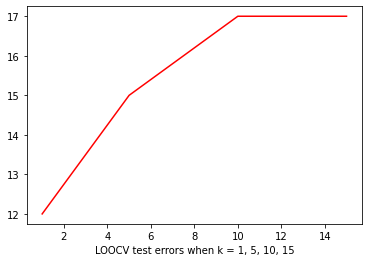

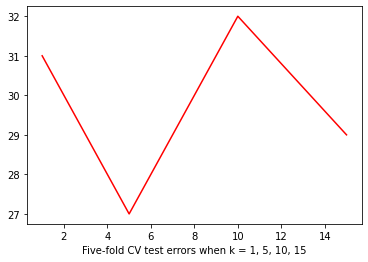

Done


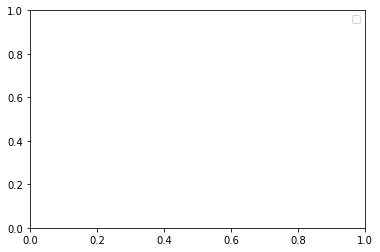

In [35]:
class KnnModel:
    def __init__(self, nhrs, train_target):
        self.nhrs = nhrs
        self.train_target = train_target

    def predict(self, test_data):
        distances, indices = self.nhrs.kneighbors(test_data.reshape(1, -1))
        votes = self.train_target[indices]
        (candidate, counts) = np.unique(votes, return_counts=True)
        prediction = candidate[np.argmax(counts)]
        return prediction

def knn_train(train_data, train_target, k):
    nhrs = NearestNeighbors(n_neighbors=k).fit(train_data)
    model = KnnModel(nhrs, train_target)
    return model

def knn_predict(model, test_data):
    scores = np.zeros(len(test_data))
    for i in range(len(test_data)):
        score = model.predict(test_data[i])
        scores[i] = score

    return scores

def knn(train, test, k):
    train_data = train[:, 0:7]
    train_target = train[:, 7]
    test_data = test[:, 0:7]
    test_target = test[:,7]
    model = knn_train(train_data, train_target, k)

    scores = knn_predict(model, test_data)
    error = np.sum(test_target != scores)
    return error

# test using
error = knn(normalized_dt[0:150,:], normalized_dt[150:,:], 5)

# leave-one-out cross validation
errors_LOOCV = [0] * 4
for i in range(0, normalized_dt.shape[0]):
    train = normalized_dt[np.arange(normalized_dt.shape[0]) != i, :]
    test = np.reshape(normalized_dt[i, :], (1, 8))
    errors_LOOCV[0] += knn(train, test, 1)
    errors_LOOCV[1] += knn(train, test, 5)
    errors_LOOCV[2] += knn(train, test, 10)
    errors_LOOCV[3] += knn(train, test, 15)

plt.plot([1, 5, 10, 15], errors_LOOCV, 'r-')
plt.xlabel('LOOCV test errors when k = 1, 5, 10, 15')
plt.show(block=False)


# five-fold cross validation
five_fold = np.split(normalized_dt, 5)
errors_5FCV = [0] * 4
for i in range(0, 5):
    train = np.concatenate(five_fold[0:i] + five_fold[i+1:5])
    test = np.array(five_fold[i])
    errors_5FCV[0] += knn(train, test, 1)
    errors_5FCV[1] += knn(train, test, 5)
    errors_5FCV[2] += knn(train, test, 10)
    errors_5FCV[3] += knn(train, test, 15)

plt.plot([1, 5, 10, 15], errors_5FCV, 'r-')
plt.xlabel('Five-fold CV test errors when k = 1, 5, 10, 15')
plt.show(block=False)

plt.legend(['LOOCV','5FCV'])

print('Done')

For the LOOCV, k = 1 is overfitting because when k = 1 we estimate the probability based on the closest neighbor, which is a single sample and can be sensitive to noise. When k goes up, the error goes up, but it's a crazy amount. So it's appropriately fitting when k = 5 and after, although there's a chance it underfits.

For the 5-fold CV, k = 1 is also overfitting for the same reason above. It's fitting appropriately when k = 5 becuase the error reduces a little amount. However, there's a big change from k = 5 to k = 10 and it seems overfit. Moreover, when k = 15, it seems underfit.

### 3. 
Apply two other classifiers of your choice to the same data. For these additional classifiers, you may use existing libraries, such as scikit-learn classifiers, but for cross-validation, you should reuse your method from 3.2 or modify it slightly. Possible algorithms include (but are not limited to) logistic regression, QDA, naive Bayes, SVM, and decision trees. Use 5-fold cross validation to calculate the test error. Report the training and test errors. If any tuning parameters need to be selected, use cross- validation and report the training and test error for several values of the tuning parameters. Which of the classifiers performed best? Did any of them underfit or overfit the data? How do they compare to the k-nn classifiers in terms of performance?

#### SVM
`svm.SVC(kernel=‘rbf’, C=1.0, gamma=‘auto’)`
There're three parameters: `kernel`, `C`, `gamma`
- `kernel`: rbf is the default
- `C`: penalty coefficient. default = 1.0. When C is higher, the accuracy of the classifier is higher, but the fault tolerance rate will be lower, and the generalization ability will be worse. When C is smaller, the generalization ability will be stronger, but the accuracy will be reduced. 
- `gamma`: = 1 / n_features

For the `kernel` and `gamma`, we use the default value and tune `C`.


In [73]:
Cs = [0.01, 1, 10, 50, 100, 500, 1000]
train_errors = [0] * len(Cs)
test_errors = [0] * len(Cs)

for k in range(len(Cs)):
  for i in range(0, 5):
    train = np.concatenate(five_fold[0:i] + five_fold[i+1:5])
    test = np.array(five_fold[i])

    clf = SVC(kernel='rbf', gamma='auto', C=Cs[k])
    clf.fit(train[:, 0:7], train[:, 7])
    train_errors[k] += sum(clf.predict(train[:, 0:7]) != train[:, 7])
    test_errors[k] += sum(clf.predict(test[:, 0:7]) != test[:, 7])

train_errors, test_errors

([301, 64, 46, 35, 26, 12, 7], [210, 43, 26, 24, 24, 27, 22])

When C = 100 (train error = 26 and test error = 24), it performs best. When C = 500, 100 (train error = 12, 7 and test error = 27, 22), it overfits the data. 

#### Decision Tree

`min_samples_split`： the minimum number of samples required to split an internal node. default = 2

In [68]:
min_samp_split = [2, 5, 8, 10, 12]
train_errors = [0] * len(min_samp_split)
test_errors = [0] * len(min_samp_split)

for k in range(len(min_samp_split)):
  for i in range(0, 5):
    train = np.concatenate(five_fold[0:i] + five_fold[i+1:5])
    test = np.array(five_fold[i])

    clf = tree.DecisionTreeClassifier(min_samples_split=min_samp_split[k])
    clf.fit(train[:, 0:7], train[:, 7])
    train_errors[k] += sum(clf.predict(train[:, 0:7]) != train[:, 7])
    test_errors[k] += sum(clf.predict(test[:, 0:7]) != test[:, 7])

train_errors, test_errors

([0, 10, 17, 18, 24], [47, 43, 43, 43, 50])

Decision tree overfits the data, regardless of `min_samples_split` we chose because it performs significantly better on the training set than the testing set.

Performance: SVM >= KNN > Decision Tree. This is because decision tree overfits for the whole time. The best appropriately fitting test error for SVM is when C = 100 with test error = 24. The best appropriately fitting test error for KNN is when k = 5 with test error = 27. So SVM performs slightly better. 

## Problem 4

### 1. 
Suppose we take all the weights and biases in a network of perceptrons, and multiply them by a positive constant, c > 0. Show that the behavior of the network doesn’t change. (Exercise in Ch1 Nielsen book)


The perceptron output is 
$$\text { output }=\left\{\begin{array}{ll}0 & \text { if } w \cdot x+b \leq 0 \\ 1 & \text { if } w \cdot x+b>0\end{array}\right.$$

After multiplying all the weights and biases by $c$, where $c>0$, it becomes
$$\text { output }=\left\{\begin{array}{ll}0 & \text { if } c \cdot w \cdot x+ c \cdot b = c \cdot (w \cdot x + b) \leq 0 \\ 1 & \text { if } c \cdot w \cdot x+ c \cdot b = c \cdot (w \cdot x+b)>0\end{array}\right.$$

The behavior doesn't change.

QED.


### 2. 
Given the same setup of problem 4.1 - a network of perceptrons - suppose that the overall input to the network of perceptrons has been chosen and fixed. Suppose the weights and biases are such that $wx+b \ne 0$ for the input $x$ to any particular perceptron in the network. Now replace all the perceptrons in the network by sigmoid neurons, and multiply the weights and biases by a positive constant $c > 0$. Show that in the limit as $c \to \infty$ the behavior of this network of sigmoid neurons is exactly the same as the network of perceptrons. How can this fail when $wx + b = 0$ for one of the perceptrons? (Exercise in Ch1 Nielsen book)

The output of a sigmoid neurons is $\frac{1}{1+\exp \left(-\sum_{j} w_{j} x_{j}-b\right)}$. Replacing all perceptrons in the network by sigmoid neurons and multiply the weights and biases by a positive constant $c > 0$, we have

$$\sigma(cwx+b) = \frac{1}{1+\exp \left(-c (\sum_{j} w_{j} x_{j} + b)\right)}.$$

Suppose $wx+b \ne 0$. Then

- If $wx+b < 0$, as $c \to \infty$, $\frac{1}{1+\exp \left(-c (\sum_{j} w_{j} x_{j} + b)\right)} \to \frac{1}{\infty} = 0$.

- If $wx+b > 0$, as $c \to \infty$, $\frac{1}{1+\exp \left(-c (\sum_{j} w_{j} x_{j} + b)\right)} \to \frac{1}{1+0} = 1$.

This is same as the behavior of the network of perceptrons. 

When 
$wx+b = 0$ for one of the perceptrons, then $\sigma(0) = \frac{1}{2}$, which is different from the perceptron behaviour, so it fails. 

### 3. 
For each possible input of the MLP in Figure 1, calculate the output. I.e., what is the output if
X = [0, 0, 0], X = [0, 0, 1], etc. You should have 8 cases total.


In [37]:
def step_function(x):
    return 1 if x >= 0 else 0

def mlp_output(x1, x2, x3):
    a11 = step_function(0.6 * x1 + 0.5 * x2 - 0.6 * x3 - 0.4)
    a12 = step_function(-0.7 * x1 + 0.4 * x2 + 0.8 * x3 - 0.5)
    return step_function(a11 + a12 - 0.5)

print(mlp_output(0, 0, 0), mlp_output(0, 0, 1), mlp_output(0, 1, 0), mlp_output(0, 1, 1), 
      mlp_output(1, 0, 0), mlp_output(1, 0, 1), mlp_output(1, 1, 0), mlp_output(1, 1, 1))

0 1 1 1 1 0 1 1


### 4. 
If we change the perceptrons in Figure 1 to sigmoid neurons what are the outputs for the same inputs
(e.g., inputs of [0,0,0], [0,0,1], ...)?


In [38]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

def mlp_sigmoid_output(x1, x2, x3):
    a11 = sigmoid(0.6 * x1 + 0.5 * x2 - 0.6 * x3 - 0.4)
    a12 = sigmoid(-0.7 * x1 + 0.4 * x2 + 0.8 * x3 - 0.5)
    return sigmoid(a11 + a12 - 0.5)

print(mlp_sigmoid_output(0, 0, 0), mlp_sigmoid_output(0, 0, 1), mlp_sigmoid_output(0, 1, 0), mlp_sigmoid_output(0, 1, 1), 
      mlp_sigmoid_output(1, 0, 0), mlp_sigmoid_output(1, 0, 1), mlp_sigmoid_output(1, 1, 0), mlp_sigmoid_output(1, 1, 1))

0.5692650013354738 0.5850122870764839 0.6224593312018545 0.6331439900185163 0.569867165880021 0.5750840158888638 0.6173258807992257 0.6283113278311999


### 5.
Using perceptrons with appropriate weights and biases, design an adder that does two-bit binary addition. That is, the adder takes as input two two-bit binary numbers (i.e. 4 binary inputs) and adds them together. Don’t forget to include the carry bit. The resulting output should be the two-bit sum and the carry bit for a total of three binary outputs.

Please see the pdf file.

### Problem 5

### 1. 
Run the Python code given in Chapter 1 of the Nielsen book in the section titled ”Implementing our network to classify digits”. You can find a link to the code at the beginning of the section. Verify that you understand each line of the code and that you obtain the same results as given in the book.


Please see the pdf file.

### 2. 
We will now explore feedforward networks using PyTorch. You may find this tutorial helpful: https: //nextjournal.com/gkoehler/pytorch-mnist. A few additional points:

• Create one hidden layer (with 128 units) between the input and output by creating another weight and bias variable.

• Try training this without a non-linearity between the layers (linear activation), and then try adding a sigmoid non-linearity both before the hidden layer and after the hidden layer, recording your test accuracy results for each in a table.

• Try adjusting the learning rate (by making it smaller) if your model is not converging/improving in accuracy. You might also try increasing the number of epochs used.

• Experiment with the non-linearity used before the middle layer. Here are some activation functions to choose from: relu, softplus, elu, tanh.

• Experiment with the learning rate, optimizer and activation function of your network.

• Lastly, experiment with the width of the hidden layer, keeping the activation function that performs best. Remember to add these results to your table.

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision.datasets as datasets
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

mnist_train = datasets.MNIST(root = 'data', train=True, download=True, transform = transforms.ToTensor())
mnist_test = datasets.MNIST(root = 'data', train=False, download=True,transform = transforms.ToTensor())

def evaluate(model, evaluation_set, loss_fn):
    """
    Evaluates the given model on the given dataset.
    Returns the percentage of correct classifications out of total classifications.
    """
    with torch.no_grad(): # this disables backpropogation, which makes the model run much more quickly.
        # TODO: Fill in the rest of the evaluation function.
        losses = []
        sum_total = 0
        for data, targets in evaluation_set:
          data = data.to(device)
          targets = targets.to(device)
          model_input = data.view(-1, 784)
          out = model(model_input)
          arg_maxed = torch.argmax(out, dim = 1)
          
          sum_total += (arg_maxed == targets).float().sum()
          losses.append(loss_fn(out, targets).item())
        loss = sum(losses) / len(losses)
        accuracy =  100 * sum_total / len(evaluation_set.dataset)
    return accuracy, loss

def train(model,loss_fn, optimizer, train_loader, test_loader):
    """
    This is a standard training loop, which leaves some parts to be filled in.
    INPUT:
    :param model: an untrained pytorch model
    :param loss_fn: e.g. Cross Entropy loss of Mean Squared Error.
    :param optimizer: the model optimizer, initialized with a learning rate.
    :param training_set: The training data, in a dataloader for easy iteration.
    :param test_loader: The testing data, in a dataloader for easy iteration.
    """
    num_epochs = 100 # obviously, this is too many. I don't know what this author was thinking.
    train_loss = []
    train_acc = []
    test_loss = []
    test_acc = []
    for epoch in range(num_epochs):
        # loop through each data point in the training set
        for data, targets in train_loader:
            data = data.to(device)
            targets = targets.to(device)
            optimizer.zero_grad()
            
            # run the model on the data
            model_input = data.view(-1, 784)# TODO: Turn the 28 by 28 image tensors into a 784 dimensional tensor.
            out = model(model_input)

            # Calculate the loss
            loss = loss_fn(out,targets)

            # Find the gradients of our loss via backpropogation
            loss.backward()

            # Adjust accordingly with the optimizer
            optimizer.step()

        # Give status reports every 100 epochs
        if epoch % 10==0:
            print(f" EPOCH {epoch}. Progress: {epoch/num_epochs*100}%. ")
            tr_acc, tr_loss = evaluate(model, train_loader, loss_fn)
            te_acc, te_loss = evaluate(model, test_loader, loss_fn)
            train_loss.append(tr_loss)
            train_acc.append(tr_acc)
            test_loss.append(te_loss)
            test_acc.append(te_acc)

            
            print(f" Train accuracy: {tr_acc}. Test accuracy: {te_acc}") #TODO: implement the evaluate function to provide performance statistics during training.

    return train_loss, train_acc, test_loss, test_acc

class FeedForwardNet(nn.Module):
    """ Simple feed forward network with one hidden layer."""
    # Here, you should place an exact copy of the code from the LogisticRegression class, with two modifications:
    # 1. Add another weight and bias vector to represent the hidden layer
    # 2. In the forward function, add some type of nonlinearity to the output of the first layer, then pass it onto the hidden layer.
    def __init__(self):
      super(FeedForwardNet, self).__init__()
      self.W1 = nn.Parameter(torch.randn((784, 128)), requires_grad = True)
      self.b1 = nn.Parameter(torch.zeros((1, 128)), requires_grad = True)
      self.W2 = nn.Parameter(torch.randn((128, 10)), requires_grad = True)
      self.b2 = nn.Parameter(torch.zeros((1, 10)), requires_grad = True)

    def forward(self, x):
      predictions = torch.matmul(x, self.W1) + self.b1
      predictions = F.relu(predictions)
      predictions = torch.matmul(predictions, self.W2) + self.b2
      predictions = F.softmax(predictions)
      return predictions

model = FeedForwardNet().to(device)
# initialize the optimizer, and set the learning rate
adam = torch.optim.Adam(model.parameters(), lr = 3e-3) # This is absurdly high.
# initialize the loss function. You don't want to use this one, so change it accordingly
loss_fn = torch.nn.CrossEntropyLoss()
batch_size = 128
train_loader = torch.utils.data.DataLoader(mnist_train, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(mnist_test, batch_size=batch_size, shuffle=True)
train_loss, train_acc, test_loss, test_acc = train(model = model,loss_fn = loss_fn, optimizer = adam, train_loader = train_loader, test_loader = test_loader)

Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw


Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw


Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw


Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw
Processing...
Done!



/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:480: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:141.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:101: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


 EPOCH 0. Progress: 0.0%. 
 Train accuracy: 60.959999084472656. Test accuracy: 60.90999984741211
 EPOCH 10. Progress: 10.0%. 
 Train accuracy: 68.08333587646484. Test accuracy: 67.41999816894531
 EPOCH 20. Progress: 20.0%. 
 Train accuracy: 77.3116683959961. Test accuracy: 76.62999725341797
 EPOCH 30. Progress: 30.0%. 
 Train accuracy: 77.82500457763672. Test accuracy: 76.83999633789062
 EPOCH 40. Progress: 40.0%. 
 Train accuracy: 78.41999816894531. Test accuracy: 77.56999969482422
 EPOCH 50. Progress: 50.0%. 
 Train accuracy: 78.73500061035156. Test accuracy: 77.87999725341797
 EPOCH 60. Progress: 60.0%. 
 Train accuracy: 78.78666687011719. Test accuracy: 77.73999786376953
 EPOCH 70. Progress: 70.0%. 
 Train accuracy: 79.07167053222656. Test accuracy: 77.90999603271484
 EPOCH 80. Progress: 80.0%. 
 Train accuracy: 96.45999908447266. Test accuracy: 95.88999938964844
 EPOCH 90. Progress: 90.0%. 
 Train accuracy: 97.4366683959961. Test accuracy: 96.58999633789062


### 3. 
What percentage classification accuracy does your feedforward network achieve?

test accuracy = 96.69%


### 4. 
Create a plot of the training and test error vs the number of iterations. How many iterations are sufficient to reach good performance?



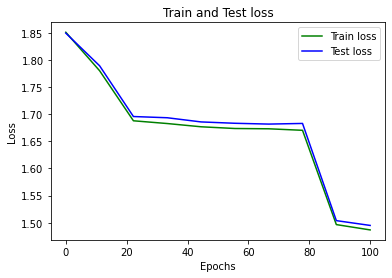

In [ ]:
import numpy as np
epochs = np.linspace(0, 100, 10)
plt.plot(epochs, train_loss, 'g', label='Train loss')
plt.plot(epochs, test_loss, 'b', label='Test loss')
plt.title('Train and Test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Around 90 epochs seems to be sufficient, 100 is better. 

### 5. 
Print the confusion matrix showing which digits were misclassified, and what they were misclassified as. What numbers are frequently confused with one another by your model?


In [ ]:
from sklearn.metrics import confusion_matrix as conf_mat
labels = []
outs = []
with torch.no_grad():
  for i, (inputs, classes) in enumerate(test_loader):
    inputs = inputs.to(device)
    classes = classes.to(device)
    outputs = model(inputs.view(-1, 784))
    preds = torch.argmax(outputs, 1)
    labels.extend(classes.detach().cpu().numpy())
    outs.extend(preds.detach().cpu().numpy())

conf_mat(labels, outs)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:101: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


array([[ 967,    0,    1,    1,    0,    1,    5,    2,    3,    0],
       [   0, 1121,    4,    3,    0,    0,    2,    0,    5,    0],
       [   5,    2, 1001,    4,    2,    1,    3,    7,    6,    1],
       [   0,    0,    4,  993,    0,    2,    0,    3,    3,    5],
       [   0,    0,    2,    0,  959,    0,    5,    1,    2,   13],
       [   5,    2,    1,    8,    1,  859,    3,    1,   10,    2],
       [   4,    2,    1,    1,    5,    3,  937,    0,    5,    0],
       [   1,    4,    8,    4,    2,    1,    0,  993,    1,   14],
       [   2,    0,    7,    6,    6,    2,    2,    3,  937,    9],
       [   5,    4,    0,   10,   17,    5,    1,    5,    7,  955]])

It seems that 7 was often mistaken for 2, as was 9 for 4. Others are doing pretty well. 

### 6. 
Report the best accuracy and briefly describe the training scheme that reached this accuracy.

Using relu activation functions with an Adam optimizer this accuracy was achieved. It worked best with 1e-3 learning rate. I tried with various learning rates and it seemed Adam with this learning rate worked best.